## THIS LESSON IS DepreCATED BECAUSE it doesn't consider file opening conventions for python. 

{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* 

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the
data for week 6 of the course.

{% include/data_subsets/course_earth_analytics/_data-cold-springs-fire.md %}
</div>


Intro here.

In [1]:
import rasterio as rio
import geopandas as gpd
import earthpy as et
import os
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
import matplotlib.pyplot as plt
import matplotlib as mpl
from rasterio.plot import show
import numpy as np
from glob import glob
plt.ion()

#from skimage.util import img_as_ubyte
from scipy.misc import bytescale

mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

When working with multi-band rasters in python that are stored in a format where each file contains one band, you will often begin by creating a list of files. Do that first. 

In [3]:
all_landsat_bands = glob("data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/*band*.tif")
all_landsat_bands

['data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band2_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_201702


If you wish to only work with a select subset of those bands - for instance to plot the data, you might want to do the following.

1. define the bands that you wish to work with
2. import those bands into a numpy array
3. OPTIONAL: if you'd like to plot the data, you will need to transpose it so the bands (the z dimension of the data) are on the z axis. Matplotlib requires this. 

The code below performs the steps defined above. 


In [4]:
# define the bands that you wish to work with. Note that the numbers below represent the index of each band in the list 
# created above
plot_indices = [3, 2, 1]

# create an empty list to populate with each matrix
data = []
# loop through and grab the bands defined above.
for ix in plot_indices:
    this_file = all_landsat_bands[ix]
    # open and read the data with rasterio
    data.append(rio.open(this_file).read()[0])
# transpose the data for plotting        
landsat_data = np.array(data).transpose([1, 2, 0])

## Python Raster Stack Function

You can turn the steps above into a function with very little extra work. Once it's a function, it will reduce the amount of code that you need to write each time you import some data. 

In [5]:
# function that stacks the data and returns an optional transposed output for plotting if you need it
# - should use concatenate because there may be multi bands tifs that .append will not catch with the code below...

def stack_raster(band_indices, file_list, transpose=False):
   '''
    This function creates a raster stack or a stacked numpy array from a list of raster files
    Inputs:
        an array of index locations that define the "bands" in a list of rasters that you wish to turn into a stack
    Returns:
        A numpy array with the data stacked row, column band. Band is last as that is what matplotlib wants when plotting
   '''
   im_arr = []
   for i in band_indices:
       this_file = file_list[i]
       with rio.open(this_file, 'r') as fi:
           temp = fi.read(1)
       im_arr.append(temp)
    # turn into an array
   im_arr = np.array(im_arr)
   if transpose:    
     im_arr = im_arr.transpose([1, 2, 0])     
   return(im_arr)

Once you have written your function, call it as follows.

In [6]:
band_numbers = [3, 2, 1]
rgb_image = stack_raster(band_indices = band_numbers, 
                         file_list = all_landsat_bands,
                         transpose = True)

## Plot RGB Image

Once you have created a 3 band matrix, you can plot it. 
Be sure that you set `transpose = True` if you want to plot the data!

/Users/lewa8222/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  from ipykernel import kernelapp as app


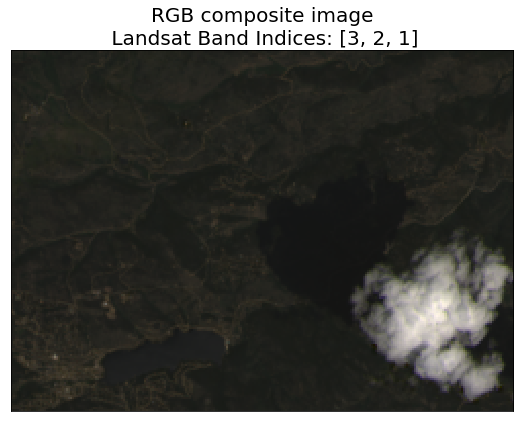

In [10]:
fig, ax = plt.subplots(figsize =(9,9))
ax.imshow(bytescale(rgb_image))
ax.set(title="RGB composite image\n Landsat Band Indices: {}".format(band_numbers))
ax.set(xticks=[], yticks=[]);

/Users/lewa8222/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  from ipykernel import kernelapp as app


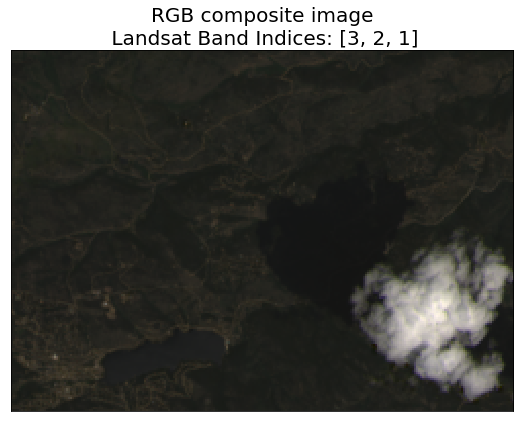

In [11]:
fig, ax = plt.subplots(figsize =(9,9))
ax.imshow(bytescale(rgb_image))
ax.set(title="RGB composite image\n Landsat Band Indices: {}".format(band_numbers))
ax.set(xticks=[], yticks=[]);

Let's try this out with different band combinations!

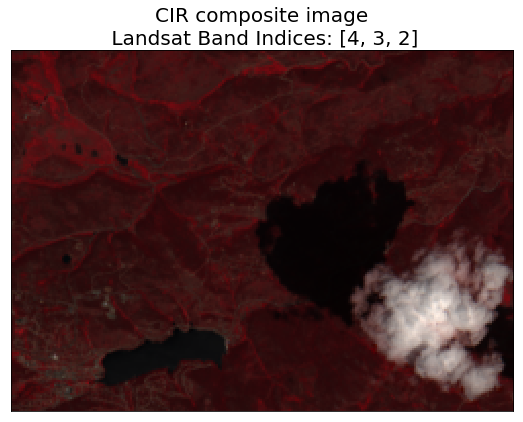

In [13]:
band_numbers = [4, 3, 2]
cir_image = stack_raster(band_indices = band_numbers, 
                         file_list = all_landsat_bands,
                         transpose = True)
fig, ax = plt.subplots(figsize =(9,9))
# switch this to el.bytescale 
ax.imshow(es.bytescale(cir_image))
ax.set(title="CIR composite image\n Landsat Band Indices: {}".format(band_numbers))
ax.set(xticks=[], yticks=[]);

### Add Image Stretch To Your Function

The function above quickly stacks and transposes the data. However, the data are still 
plotting dark. It would be nice to add an image stretch capability to the function. 


In [ ]:
band_numbers = [3, 2, 1]
rgb_image = stack_raster2(band_indices = band_numbers, 
                         file_list = all_landsat_bands,
                         transpose = True)

In [ ]:
# stretch the image so that it plots nicer. 
# the stretch below clips at the 2nd and 98th percentile
# http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

from skimage import data, img_as_float
from skimage import exposure

all_bands = []
for i in range(rgb_image.shape[2]):
    band = rgb_image[:,:,i]
    #print(band.shape)
    p2, p98 = np.percentile(band, (2, 98))
    img_rescale = exposure.rescale_intensity(band, in_range=(p2, p98))
    all_bands.append(img_rescale)
    

#rgb_image_stretch = np.array(all_bands).transpose([1, 2, 0])
type(rgb_image_stretch)
rgb_image_stretch.shape

## Add image stretch as a function



# Need to revisit this as the colors still don't look right. 

In [ ]:
# plot the data 
fig, ax = plt.subplots()
ax.imshow(bytescale(rgb_image_stretch))
ax.set(title="RGB composite image Landsat Bands(4,3,2) \npython band indices: {}".format(plot_indices))
ax.set(xticks=[], yticks=[]);

## NDVI FUnction here

Below i'll start to work on some index functions.

A generic calculate normalized difference function will be good and widely useable.



In [ ]:
# calculate NDVI
# this is super insanely crazy

band_numbers = [3, 4]
ndvi_bands = stack_raster2(band_indices = band_numbers, 
                         file_list = all_landsat_bands,
                         transpose = False)
ndvi_bands.shape

In [ ]:
# calculate NDVI
landsat_ndvi = (ndvi_bands[1] - ndvi_bands[0]) / (ndvi_bands[1] + ndvi_bands[0])
# plot the data 
fig, ax = plt.subplots(figsize=(12,6))
ndvi = ax.imshow(landsat_ndvi, cmap='PiYG')
fig.colorbar(ndvi)
ax.set(title="Landsat derived NDVI\n 23 July 2016 \n Post Cold Springs Fire")
ax.set_axis_off();